In [134]:
from scipy.io import wavfile
import scipy
from scipy.signal import lfilter,firwin
import numpy as np
from pylab import *
import matplotlib.pyplot as plt

(array([1.84449892e+03, 9.21856781e+02, 3.20546797e-03, ...,
        1.18955393e-10, 1.21922885e-10, 3.99717517e-11]),
 array([0.00000000e+00, 9.07029478e-05, 1.81405896e-04, ...,
        9.99818594e-01, 9.99909297e-01, 1.00000000e+00]))

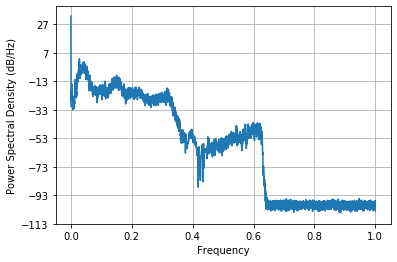

In [135]:
fs,data = wavfile.read('Without_filter.wav')

min_data = min(data)
max_data = max(data)

data = (data-min_data)/(max_data-min_data)
        
#plt.plot(normalizedData)
#print(max(data))
#normalize the data
#data = data/max(data)#(np.linalg.norm(data)) 

plt.psd(data,fs)

In [136]:
def plot_response(fs, w, h, title):
     "Utility function to plot response functions"
     fig = plt.figure()
     ax = fig.add_subplot(111)
     ax.plot(0.5*fs*w/np.pi, 20*np.log10(np.abs(h)))
     ax.set_ylim(-40, 5)
     ax.set_xlim(0, 0.5*fs)
     ax.grid(True)
     ax.set_xlabel('Frequency (Hz)')
     ax.set_ylabel('Gain (dB)')
     ax.set_title(title)

In [151]:
#Nyquist rate of the signal is given by
nyq_rate = fs / 2.0
cutoff_frequency = 3500
normalized_cutoff_frequency = cutoff_frequency/nyq_rate
filter_order = 50

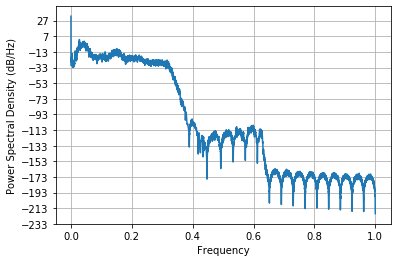

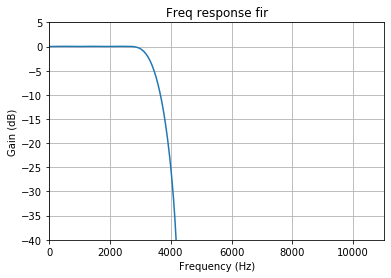

In [152]:

fir_coeff = firwin(filter_order, cutoff = normalized_cutoff_frequency, window = "hamming")
wf,hf = scipy.signal.freqz(fir_coeff)

filtered_signal = lfilter(fir_coeff,1.0,data)
plt.psd(filtered_signal,fs)
#plt.plot(filtered_signal)

plot_response(fs,wf,hf,'Freq response fir')

In [139]:
wavfile.write("Filteredfir.wav",fs,filtered_signal)

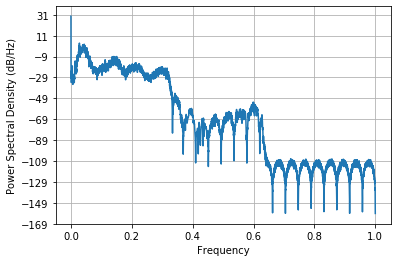

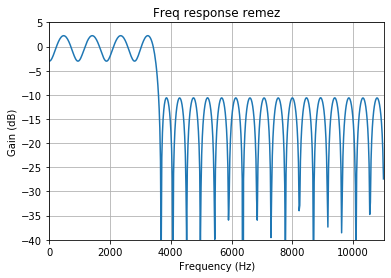

In [153]:
trans_width = 100
remez_coeff = scipy.signal.remez(filter_order,[0,cutoff_frequency,cutoff_frequency + trans_width,0.5*fs],[1,0],Hz = fs)
remez_filtered_signal = lfilter(remez_coeff,1.0,data)
plt.psd(remez_filtered_signal,fs)
wr,hr = scipy.signal.freqz(remez_coeff)
plot_response(fs,wr,hr,'Freq response remez')

In [154]:
wavfile.write("Filteredremez.wav",fs,remez_filtered_signal)

In [157]:
def firFilter(data,fs,cutoff_frequency = 4000,filter_order = 50):
    
    #Min-Max Normalization
    min_data = min(data)
    max_data = max(data)
    data = (data - min_data)/(max_data - min_data)
    #Normalization complete
    
    nyquist_rate = fs/2.0
    normalized_cutoff_frequency = cutoff_frequency/nyquist_rate
    
    filter_coefficent = firwin(filter_order,cutoff=normalized_cutoff_frequency,window = "hamming")
    filtered_signal = lfilter(filter_coefficent,1.0,data)
    return filtered_signal

(array([1.84449657e+03, 9.21862967e+02, 3.21064502e-03, ...,
        1.34080642e-21, 6.16264769e-22, 1.01017779e-22]),
 array([0.00000000e+00, 9.07029478e-05, 1.81405896e-04, ...,
        9.99818594e-01, 9.99909297e-01, 1.00000000e+00]))

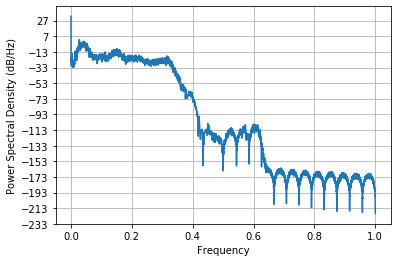

In [161]:
filtered_signal_function = firFilter(data,fs)
plt.psd(filtered_signal_function,fs)